<a id='top'></a>

# CSCI3022 S21
# Homework 2: Data Wrangling and Visualizations
***

**Name**: Sophie Lei

***

This assignment is due on Canvas by **MIDNIGHT on Monday, February 8**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 95 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) |
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

[Back to top](#top)

<a id='p1'></a>

## (25 pts) Problem 1: Data (Probability and Histograms)
*** 
The sinking of the RMS Titanic was a terrible tragedy that saw the loss of many lives. Even within this tragedy, thanks to the combinations of the records of the White Star Line and the thorough nature of follow-up research after the accident we have some records that can help us try to piece together the course of events on board the ship. Many of the historians and other researchers who have investigated this event have speculated as to what exactly happened.

We have the data on survival rates by class, gender, and age, so let's figure out whether there is evidence for some of these scenarios. Access the Titanic data in `titanic_data.csv` and store it in a Pandas DataFrame. The data contains information pertaining to class status (**Pclass**), survival (**Survived**), and gender (**Sex**) of passengers, among other things. Be sure to use the `titanic_data.csv` data set, *not* the `clean_titanic_data` file or `dirty_titanic_data` file from the in-class notebook exercises.

In [2]:
filepath = 'titanic_data.csv'
df = pd.read_csv(filepath)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,36.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,18.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,14.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,63.0,0,0,373450,8.0500,NaN,S


**Part A**:
Based on the overall population of passengers, report the probability of survival.

$$P(Survived=1)$$

In [3]:
people_survived=df['Survived'].sum()
people_total=len(df['PassengerId'])
print(people_total)
probability_survived=people_survived/people_total
print("The probability of survival is {0:.1f}%".format(100*probability_survived))

891
The probability of survival is 39.3%


**Part B**: 
Some claim that the final hours aboard the RMS Titanic were marked by "class warfare" in which the people with first-class tickets took all the good spots on the lifeboats; others claim that the final hours were characterized by male chivalry, in which the men valiantly gave up their positions in the boats and succumbed bravely to the depths of the Atlantic. 

Consider the two claims: class warfare, and male chivalry. Suppose that class warfare occurred in the final hours aboard the Titanic.  What patterns might you expect to see in the data?  Suppose that male chivalry was widespread during the final hours instead. What patterns might you then expect to see in the data?  Explain both of these hypothesized patterns in words. Are these two hypotheses mutually exclusive or not?

if class warfare happened, the probability of First-class people survival, which is the population of survived
first-class people devide by the total survived population, maybe has high percentage.
$$P(Probability of First class people of survival)=\frac{First class people \cap survived}{survived}$$

if male chivalry happened, the probability of Female and children survival, which is the population of survived
Female and children devide by the total survived population, maybe has high percentage.
$$P(Probability of Female and children survival)=\frac{(Female +children) \cap survived}{survived}$$

This two Hypotheses is not mutually exclusive, because there are Intersection of First class people set and man people set.

**Part C**: Use Pandas methods to create a clean data set by removing any rows from the DataFrame that are missing values corresponding to **Survived**, **Pclass**, **Age**, or **Sex**. Store the clean data in a DataFrame called dfTitanic. Be sure to show any exploratory work determining if/where there are rows with missing values. _HINT: There should be 714 rows in your cleaned data set._

In [4]:
dfTitanic=df.copy()
dfTitanic.dropna(subset=['Age'],inplace=True)
dfTitanic.dropna(subset=['Sex'],inplace=True)
dfTitanic.dropna(subset=['Pclass'],inplace=True)
dfTitanic.dropna(subset=['Survived'],inplace=True)
people_total=len(dfTitanic['PassengerId'])
dfTitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,36.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,18.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,14.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,63.0,0,0,373450,8.0500,NaN,S


**Part D**: Compute the probability of survival according to class, gender, and all combinations of the two variables.  Then, answer the following questions:
* **(i)** When reviewing class survival probability, how do the results compare to the base survival probability results from **Part A**?
* **(ii)** When reviewing gender survival probability, how do the results compare to the base survival probability results from **Part A**?
* **(iii)** Within each passenger class, were men or women more/less/equally likely to survive?
* **(iv)**  Did men in first class or women in third class have a higher survival probability?


In [5]:
first_class=dfTitanic.loc[dfTitanic['Pclass']==1,'Survived'].sum()
people_total=len(dfTitanic['PassengerId'])
P_C1=first_class/people_total
print("first Class survival probability is {0:.1f}%".format(100*P_C1))

second_class=dfTitanic.loc[dfTitanic['Pclass']==2,'Survived'].sum()
people_total=len(dfTitanic['PassengerId'])
P_C2=second_class/people_total
print("second Class survival probability is {0:.1f}%".format(100*P_C2))

third_class=dfTitanic.loc[dfTitanic['Pclass']==3,'Survived'].sum()
people_total=len(dfTitanic['PassengerId'])
P_C3=third_class/people_total
print("third Class survival probability is {0:.1f}%".format(100*P_C3))

gender=dfTitanic.loc[dfTitanic['Sex']=='male','Survived'].sum()
people_total=len(dfTitanic['PassengerId'])
G_C=gender/people_total
print("male survival probability is {0:.1f}%".format(100*G_C))

genderf=dfTitanic.loc[dfTitanic['Sex']=='female','Survived'].sum()
people_total=len(dfTitanic['PassengerId'])
G_Cf=genderf/people_total
print("female survival probability is {0:.1f}%".format(100*G_Cf))

fc=(dfTitanic['Pclass']==1)&(dfTitanic['Sex']=='female')
first_classf=dfTitanic.loc[fc,'Survived'].sum()
ptf=len(dfTitanic['Pclass']==1)
P_C1f=first_classf/ptf
print("female survival probability within firstclass is {0:.1f}%".format(100*P_C1f))

fcm=(dfTitanic['Pclass']==1)&(dfTitanic['Sex']=='male')
first_classfm=dfTitanic.loc[fcm,'Survived'].sum()
ptf=len(dfTitanic['Pclass']==1)
P_C1fm=first_classfm/ptf
print("male survival probability within firstclass is {0:.1f}%".format(100*P_C1fm))

sc=(dfTitanic['Pclass']==2)&(dfTitanic['Sex']=='female')
second_classf=dfTitanic.loc[sc,'Survived'].sum()
pts=len(dfTitanic['Pclass']==2)
P_C2f=second_classf/pts
print("female survival probability within second class is {0:.1f}%".format(100*P_C2f))

scm=(dfTitanic['Pclass']==2)&(dfTitanic['Sex']=='male')
second_classfm=dfTitanic.loc[scm,'Survived'].sum()
pts=len(dfTitanic['Pclass']==2)
P_C2fm=second_classfm/pts
print("male survival probability within second class is {0:.1f}%".format(100*P_C2fm))

tc=(dfTitanic['Pclass']==3)&(dfTitanic['Sex']=='female')
third_classf=dfTitanic.loc[tc,'Survived'].sum()
ptt=len(dfTitanic['Pclass']==3)
P_C3f=third_classf/ptt
print("female survival probability within third class is {0:.1f}%".format(100*P_C3f))

tcm=(dfTitanic['Pclass']==3)&(dfTitanic['Sex']=='male')
third_classfm=dfTitanic.loc[tcm,'Survived'].sum()
ptt=len(dfTitanic['Pclass']==3)
P_C3fm=third_classfm/ptt
print("male survival probability within third class is {0:.1f}%".format(100*P_C3fm))

first Class survival probability is 15.1%
second Class survival probability is 9.8%
third Class survival probability is 14.1%
male survival probability is 12.7%
female survival probability is 26.3%
female survival probability within firstclass is 10.1%
male survival probability within firstclass is 5.0%
female survival probability within second class is 7.6%
male survival probability within second class is 2.2%
female survival probability within third class is 8.7%
male survival probability within third class is 5.5%


* **(i)** The PartA result basically is the addition of first Class survival probability, second Class survival probability and third Class survival probability. The first class survived probability has slightly higher than other classes.
* **(ii)**  The PartA result basically is the addition of male survival probability add female survival probability.
* **(iii)** with in all classes. female is more likely to survive.
* **(iv)** probility of male survived in first class is similiar to probility of male survived in third class. but relatively higher than the probility of male survival within second class. 
    probility of female survived in third class is lower than the probility of female survived in first class. but relatively higher than probility of female survived in second class. 

**Part E**: One might wonder how a passenger's age is related to the likelihood that they would survive the Titanic disaster. In addition to the "male chivalry" argument outlined above, you can perhaps imagine an addendum - "women and children first!" - as the cry to ring out across the decks. Or you might imagine the opposite - rather than "class warfare", it is simply healthy adults fighting to take lifeboat spots for themselves.

To answer this question graphically, plot two density histograms on the same set of axes, showing the distribution of the ages of passengers who survived, and the distribution of the ages of passengers who did not. 
* Use the bin edges $[0,5,10,\ldots,70,75,80]$ for both histograms.
* To better distinguish between our populations, we will represent survivors with `navy` (as they were eventually rescued by ships) and those who passed away with `sandybrown`.
* Plot both histograms on a single set of axes (there should be only one panel in the figure you create), but use Matplotlib/Pandas plotting functionality to make the faces of the histogram boxes somewhat transparent, so both histograms are visible.
* Include a legend and label your axes.
* Comment on the results. Does your figure suggest that some age ranges are more or less likely to have survived the disaster than other ages? Fully explain your reasoning and use your figure to justify your conclusions.
* If you noticed some relationship between age and likelihood of survival, what is one possible explanation?

Text(0, 0.5, 'density')

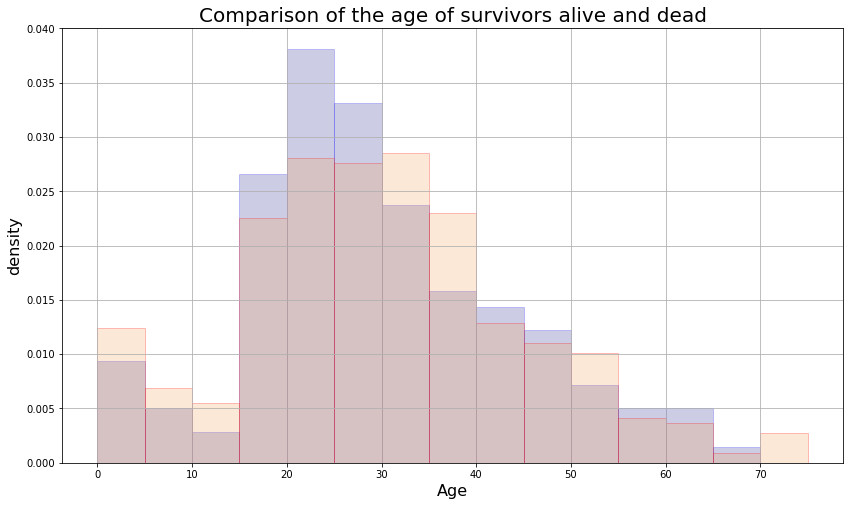

In [6]:
my_bins = range(0,80,5)
fig,ax=plt.subplots(figsize=(14,8))

dfTitanic.loc[dfTitanic['Survived']==1].hist(column="Age", density=True, ax=ax, bins=my_bins,edgecolor="blue", facecolor = 'navy',alpha=0.2);
dfTitanic.loc[dfTitanic['Survived']==0].hist(column="Age", density=True, ax=ax,bins=my_bins,edgecolor="red",facecolor="sandybrown", alpha=0.25);
ax.set_title("Comparison of the age of survivors alive and dead", fontsize=20)
ax.set_xlabel("Age",fontsize=16)
ax.set_ylabel("density",fontsize=16)

people from 15 to 30 are more likely survived in this disaster. From the figure, we can see the largest survived group is from 20 to 25. The density of survival from Age 15 to 30 compare to the dead people is relatively higher.
it may because people from 15 to 30 are stronger and healthier so they can last longer when they flaoting in the sea to wait to be rescued. 

**Part F:** In Part E, we plotted two *density* histograms, showing the distributions of ages of passengers that survived or did not survive the Titanic disaster. Why would it be misleading for us to have plotted these as *frequency* histograms instead?

The frequency histogram shows the population of age in each bin. The density histogram adjusts the height to make the sum of each bin equal one. 
we count the probability of different age people survival or not from density histogram. so we can compare that probability easier. from frequency histograms, we may see the largest number of which age bin people survived. but it may because of the large overall population of that age bin, so er can not conclude that this group of people are more likely to survive.

**Part G**: Do the data suggest class warfare, male chivalry, age bias, or some combination of these characteristics in the final hours aboard the Titanic?  Justify your conclusions based on the computations done above, or do any other analysis that you like, but be sure to clearly justify your conclusions.

I think the male chivalry happened in the final hours aboard the Titanic. because from the Part D analysis. we can see the female survival probability is obviously higher than the male survival probability in every class. I don't think the class warfare happened because the first class survival probability is similar to the third class survival probability in Part D. I think the age bias is true, because  from Part E, within the survival group, the age from 15 to 30 survival probability is higher then other ages.

[Back to top](#top)
<a/ id='p2'></a>

## (20 pts) Problem 2: Data (Box Plots and Outliers)
***

NOAA's Physical Sciences division (https://www.esrl.noaa.gov/psd) houses an enormous amount of weather data.  Load `BoulderPrecip.csv` from the course page for the last 120 years of monthly precipitation data from Boulder.  Let's take a look!

In [7]:
dfPrecip = pd.read_csv('boulder_precip_12021.csv')
dfPrecip.head(20)


,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR TOTAL
0,1900,0.40,1.06,0.75,9.18,1.84,0.49,0.48,0.22,1.54,0.13,0.19,0.61,16.89
1,1901,0.53,0.30,1.74,3.51,1.62,1.76,0.46,1.69,0.16,0.65,Tr,1.43,13.85
2,1902,0.37,0.48,1.48,1.01,2.32,1.46,1.26,0.53,5.46,1.44,1.29,1.34,18.44
3,1903,0.08,1.52,1.45,2.31,2.02,1.87,0.95,1.46,1.31,3.43,0.15,0.16,16.71
4,1904,0.09,0.31,2.37,1.45,5.35,2.72,1.05,1.00,1.60,1.06,0.08,0.70,17.78
5,1905,0.81,0.70,1.85,6.65,4.78,0.55,1.86,0.22,1.64,2.54,0.23,Tr,21.83
6,1906,0.22,0.17,2.45,5.32,3.37,1.56,3.81,2.50,3.13,1.80,1.87,Tr,26.20
7,1907,0.22,0.56,0.47,3.59,5.29,0.59,2.79,0.44,1.06,0.58,0.41,0.27,16.27
8,1908,0.60,0.09,0.23,0.71,3.45,0.29,2.07,3.30,1.55,2.59,1.96,1.04,17.88
9,1909,0.11,1.21,3.96,3.60,1.85,1.67,3.18,2.42,4.51,0.55,1.56,1.72,26.34


**Part A:** SCRUBBING!  Our data set is going to be tough to use for a few reasons.

1) When the amount of precipitation was nonzero but too small to be recorded, this data set recorded `tr`.  Replace these with zeroes.

2) 2021 isn't over yet!  We have one row at the bottom that isn't fully complete and blank values are filling the months that haven't happened yet.  This can wreak havoc on some of our methods!  **Drop** the 2021 data entirely.

3) You may have some object typing issues relating to columns that contained both "Tr"/"NA" and numeric values.  Ensure that Python is treating all of your data as numeric! (see `df.dtypes`)

In [8]:
dfPrecip=dfPrecip.replace('Tr', float(0))
dfPrecip=dfPrecip.replace('NA', float(0))
index_names = dfPrecip[ dfPrecip['Year'] == 2021 ].index 
dfPrecip=dfPrecip.drop(index_names) 
dfPrecip['JAN']=dfPrecip['JAN'].str.replace('*','').astype(float)
dfPrecip.dropna(subset=['JAN'],inplace=True)
dfPrecip['MAY']=dfPrecip['MAY'].str.replace('*','').astype(float)
dfPrecip['FEB']=dfPrecip['FEB'].str.replace('*','').astype(float)
dfPrecip['JUN']=dfPrecip['JUN'].str.replace('*','').astype(float)
dfPrecip['AUG']=dfPrecip['AUG'].str.replace('*','').astype(float)
dfPrecip['SEP']=dfPrecip['SEP'].str.replace('*','').astype(float)
dfPrecip['OCT']=dfPrecip['OCT'].str.replace('*','').astype(float)
dfPrecip['NOV']=dfPrecip['NOV'].str.replace('*','').astype(float)
dfPrecip['DEC']=dfPrecip['DEC'].str.replace('*','').astype(float)
#dfPrecip['JAN'] = dfPrecip['JAN'].astype(float)
dfPrecip.dtypes
#dfPrecip.head()

Year            int64
JAN           float64
FEB           float64
MAR           float64
APR           float64
MAY           float64
JUN           float64
JUL           float64
AUG           float64
SEP           float64
OCT           float64
NOV           float64
DEC           float64
YEAR TOTAL    float64
dtype: object

**Part B:** Generate a series of 12 box plots with month as the x axis and precipitation on the y-axis.

Text(0.5, 1.0, 'Months')

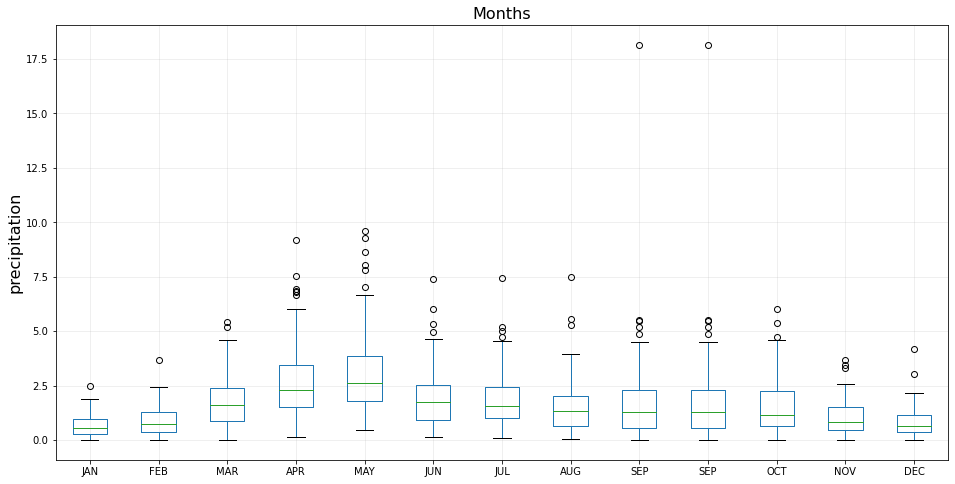

In [9]:
fig, ax = plt.subplots(figsize=(16,8))

bp=dfPrecip.boxplot(column=["JAN", "FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","SEP","OCT","NOV","DEC"],ax=ax)
ax.grid(alpha=0.25)
ax.set_ylabel("precipitation", fontsize=16)
ax.set_title("Months", fontsize=16)

    




**Part C:** Spring is the wet season in Boulder.   But what is Spring?

Atmospheric scientists love to group months seasonally, breaking the year into a Winter season including December, January, February; a Spring including March, April, and May; and so forth.

The solar year, however, says that Spring runs from near the end of March until near the end of June: let's round at the nearest month and say that it includes the months of April, May and June.

Generate a box plot with precipitation on the y-axis and the two possible monthly 'Spring' groupings (March-May versus April-June) as the x-axis.

Text(0.5, 1.0, 'Spring Groups ')

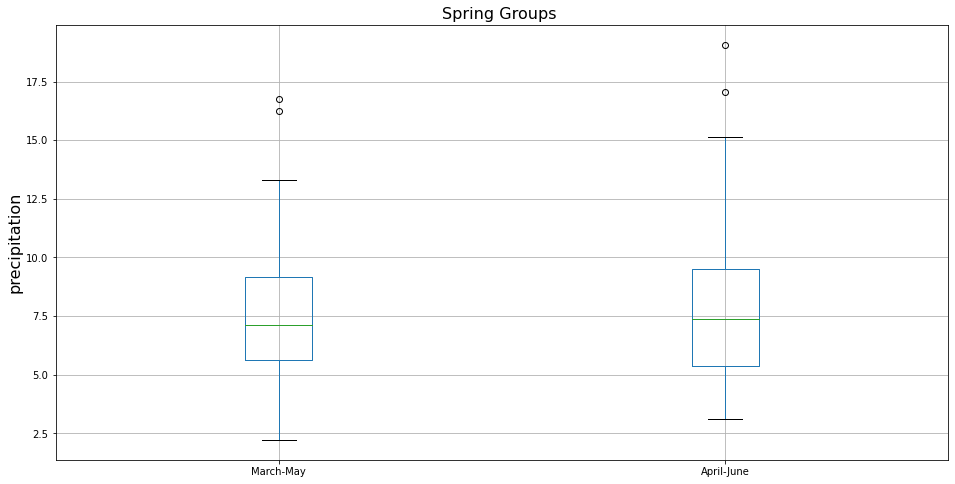

In [10]:
fig, ax = plt.subplots(figsize=(16,8))
dfPrecip["March-May"]= dfPrecip["MAR"]+dfPrecip["APR"]+dfPrecip["MAY"]
dfPrecip["April-June"]= dfPrecip["JUN"]+dfPrecip["APR"]+dfPrecip["MAY"]

#dfPrecip.head()
bp=dfPrecip.boxplot(column=["March-May","April-June"],ax=ax)
ax.set_ylabel("precipitation", fontsize=16)
ax.set_title("Spring Groups ", fontsize=16)

**Part D:** These might look pretty similar!  Highlight and comment on any differences by calculating the mean, standard deviation, and a Tukey five number summary of each classification of Spring.  Is there a reason here to favor one grouping over the other?

In [11]:
sg1_mean=dfPrecip["March-May"].mean()
print("spring group March-May mean={} ".format(sg1_mean))
sg2_mean=dfPrecip["April-June"].mean()
print("spring group April-June mean={} ".format(sg2_mean))
sg1_std=dfPrecip["March-May"].std()
print("spring group March-May standard deviation={} ".format(sg1_std))
sg2_std=dfPrecip["April-June"].std()
print("spring group April-June standard deviation={} ".format(sg2_std))
minval = dfPrecip["March-May"].min() 
maxval = dfPrecip["March-May"].max()
Q1 = dfPrecip["March-May"].quantile(.25) 
Q2 = dfPrecip["March-May"].quantile(.50) 
Q3 = dfPrecip["March-May"].quantile(.75)
print("5-Number Summary for spring group March-May: {:.2f}    {:.2f}    {:.2f}    {:.2f}    {:.2f}".format(minval, Q1, Q2, Q3, maxval))
minval = dfPrecip["April-June"].min() 
maxval = dfPrecip["April-June"].max() 
Q1 = dfPrecip["April-June"].quantile(.25)
Q2 = dfPrecip["April-June"].quantile(.50) 
Q3 = dfPrecip["April-June"].quantile(.75)
print("5-Number Summary for spring group April-June: {:.2f}    {:.2f}    {:.2f}    {:.2f}    {:.2f}".format(minval, Q1, Q2, Q3, maxval))


spring group March-May mean=7.541694915254241 
spring group April-June mean=7.708632478632478 
spring group March-May standard deviation=2.7397383695306017 
spring group April-June standard deviation=2.9516228458440383 
5-Number Summary for spring group March-May: 2.21    5.61    7.13    9.14    16.75
5-Number Summary for spring group April-June: 3.12    5.38    7.38    9.52    19.07


I think spring group April-June maybe more accuate as spring group. first, the average precipitation is higher than spring group March-May. The IQR for spring group April-June is 4.14.and the IQR for spring group March-May is 3.53.
The spread of spring group April-June precipitation data is more higher.  Spring group March-May has a positive skew because the the upper quartile $Q_3$ is farther from the median than the lower quartile $Q_1$ is from the median. 

**Part E:** Create a density histogram of the September precipitation.  Classify and describe this histogram, including discussion of any skewness, multimodality, or outliers.  Find the data point associated with September, 2013, and recreate your histogram with that value in a different color or otherwise clearly marked.

18


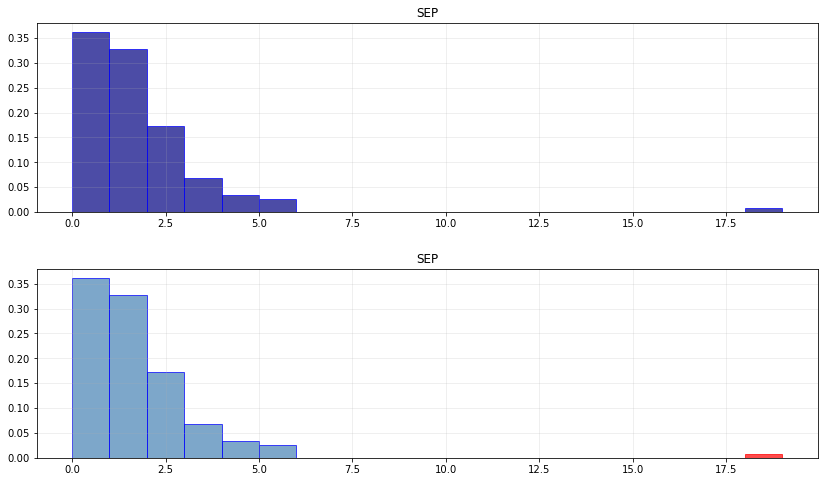

In [35]:
fig,axes=plt.subplots(nrows=2, ncols=1,figsize=(14,8))
my_bins = range(0,20,1)
#dfPrecip[['Year','SEP']].plot( x='Year', y='SEP', kind='hist')
#plt.xlim([1900,2020])
dfPrecip.hist(column="SEP", density=True,ax=axes[0],bins=my_bins, edgecolor="blue", facecolor = 'navy',alpha=0.7);
dfPrecip.hist(column="SEP", density=True,ax=axes[1],bins=my_bins, edgecolor="blue", facecolor = 'steelblue',alpha=0.7);
axes[0].grid(alpha=0.25)
axes[1].grid(alpha=0.25)
n=(dfPrecip['Year']==2013)
number_color=int(dfPrecip.loc[n, "SEP"])
#print(number_color)
axes[1].patches[number_color].set_color('red')


This density histogram shows the probability of September precipitation from 1900 to 2020. This density histogram is positive skew because the farthest number from middle is positive number. it is also bimodal, because there are kind of two up down in this density histogram. The outlier is the number above 17.5.

**Part F:** That one data point in September 2013 is pretty out there!  Compute the mean and standard deviation of the September precipitation values, then compute them again while excluding the 2013 observation.  How much did each change?

If someone were to ask you about the average weather in September, what would you respond?



In [39]:
sepMean=dfPrecip["SEP"].mean()
print("September precipitation mean ={} ".format(sepMean))
sepStd=dfPrecip["SEP"].std()
print("September precipitation standard deviation ={} ".format(sepStd))
new=dfPrecip[dfPrecip['Year']!=2013]
sepnewMean=new["SEP"].mean()
print("September precipitation mean exclude 2013={} ".format(sepnewMean))
sepnewStd=new["SEP"].std()
print("September precipitation standard deviation exclude 2013={} ".format(sepnewStd))

September precipitation mean =1.7327586206896546 
September precipitation standard deviation =1.9957452944601473 
September precipitation mean exclude 2013=1.5899130434782605 
September precipitation standard deviation exclude 2013=1.2767973198127442 


The mean of September precipitation exclude 2013 is less than the September precipitation mean, mean is a measure of the centrality of a set of values. the total September precipitation subtractiont will affect mean. 
The standard deviation of September precipitation exclude 2013 is less too. because standard deviation is a measure of the dispersion of a set of values. we exclude the outliers number will cause the spread of the set of September precipitation smaller.

[Back to top](#top)